## NHANES - Examination dataset

In [1]:
import numpy as np
import pandas as pd
import os

from pandas_profiling import ProfileReport


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
data_dir = "./datasets"

print(os.listdir("./datasets"))

['medications.csv', 'diet.csv', 'examination.csv', 'demographic.csv', 'labs.csv', 'questionnaire.csv']


In [3]:
#df_LABS = pd.read_csv(os.path.join(data_dir, 'labs.csv'))
#df_QUES = pd.read_csv(os.path.join(data_dir, 'questionnaire.csv'))
#df_DEMO = pd.read_csv(os.path.join(data_dir, 'demographic.csv'))                 
#df_DIET = pd.read_csv(os.path.join(data_dir, 'diet.csv'))
df_EXAM = pd.read_csv(os.path.join(data_dir, 'examination.csv'))

In [82]:
df_EXAM

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,...,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,1,611.0,NaN,NaN,1.0,3.0,60.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9809,83728,1,124.0,NaN,110.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9810,83729,1,679.0,NaN,NaN,1.0,4.0,80.0,1.0,1.0,...,1.0,1.0,1.0,3.0,4.0,55.0,1.0,NaN,NaN,3.0
9811,83730,1,381.0,NaN,72.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df_EXAM['BPXPTY'].value_counts()

1.0    7531
2.0      33
Name: BPXPTY, dtype: int64

### Handle with missing values

In [26]:
# if column has more than 60% empty values, drop it

df_EXAM2 = df_EXAM.dropna(thresh=df_EXAM.shape[0]*0.6, how='all',axis=1)

df_EXAM3 = df_EXAM2.dropna(inplace=False).reset_index (drop=True)

In [41]:
df_EXAM3

,SEQN,PEASCST1,PEASCTM1,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,...,OHX22CTC,OHX23CTC,OHX24CTC,OHX25CTC,OHX26CTC,OHX27CTC,OHX28CTC,OHX29CTC,OHX30CTC,OHX31CTC
0,73557,1,620.0,1.0,4.0,86.0,1.0,1.0,140.0,122.0,...,P,P,P,P,P,P,P,P,P,P
1,73558,1,766.0,1.0,4.0,74.0,1.0,1.0,170.0,156.0,...,S,S,S,S,S,S,Z,S,E,E
2,73559,1,665.0,1.0,4.0,68.0,1.0,1.0,160.0,140.0,...,S,Z,S,S,S,S,S,Z,Z,E
3,73560,1,803.0,1.0,2.0,64.0,1.0,1.0,130.0,108.0,...,D,S,S,S,S,U,D,D,S,U
4,73564,1,954.0,1.0,5.0,82.0,1.0,1.0,150.0,118.0,...,S,S,S,S,S,S,S,Z,Z,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5924,83721,1,629.0,1.0,4.0,64.0,1.0,1.0,140.0,108.0,...,S,S,S,S,S,S,S,R,Z,Z
5925,83724,1,1419.0,1.0,4.0,54.0,1.0,1.0,200.0,164.0,...,Z,S,S,S,S,S,Z,Z,R,E
5926,83727,1,611.0,1.0,3.0,60.0,1.0,1.0,140.0,110.0,...,S,S,S,S,S,S,M,S,Z,S
5927,83729,1,679.0,1.0,4.0,80.0,1.0,1.0,150.0,136.0,...,S,S,S,S,S,S,S,S,E,Z


Examination dataset: A complete variable dictionary can be found here: https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Examination&CycleBeginYear=2013

* <b>SEQN:</b>   Respondent sequence number.
* <b>PEASCCT1:</b>   Blood Pressure Comment
* <b>BPAEN1:</b>   Enhancement used first reading
* <b>BPAEN2:</b>   Enhancement used second reading
 
* <b>BPXCHR:</b>   60 sec HR (30 sec HR * 2)
* <b>OHX02CSC:</b>  Coronal Caries: Upper right 2nd molar (2M) surface calls. These values can be recorded as a string variable, for example:"0", "13", "468".

* Columns with constant values
    *  <b>BMDSTATS:</b>   Body Measures Component status Code
    *  <b>PEASCST1:</b>   Blood Pressure Status
    *  <b>MGDEXSTS:</b>   Grip test status

* <b>OHX32TC:</b>    Tooth Count: Lower right 3rd molar (3M)
* <b>OHX02CTC:</b>   Coronal Caries: Upper right 2nd molar (2M) tooth code
* <b>OHX03CTC:</b>   Coronal Caries: Upper right 1st molar (1M) tooth code
* <b>OHX04CTC:</b>   Coronal Caries: Upper right 2nd bicuspid/2nd primary molar (2B) tooth code
* <b>OHX05CTC:</b>   Coronal Caries: Upper right 1st bicuspid/1st primary molar (1B) tooth code
* <b>OHX06CTC:</b>   Coronal Caries: Upper right cuspid (C) tooth code
* <b>OHX07CTC:</b>   Coronal Caries: Upper right lateral incisor (LI) tooth code
* <b>OHX08CTC:</b>   Coronal Caries: Upper right central incisor (CI) tooth code
* <b>OHX09CTC:</b>   Coronal Caries: Upper left central incisor (CI) tooth code
* <b>OHX10CTC:</b>   Coronal Caries: Upper left lateral incisor (LI) tooth code
* <b>OHX11CTC:</b>   Coronal Caries: Upper left cuspid (C) tooth code
* <b>OHX12CTC:</b>   Coronal Caries: Upper left 1st bicuspid/1st primary molar (1B) tooth code
* <b>OHX13CTC:</b>   Coronal Caries: Upper left 2nd bicuspid/2nd primary molar (2B) tooth code
* <b>OHX14CTC:</b>   Coronal Caries: Upper left 1st molar (1M) tooth code
* <b>OHX15CTC:</b>   Coronal Caries: Upper left 2nd molar (2M) tooth code
* <b>OHX16TC:</b>    Tooth Count: Upper left 3rd molar (3M)
* <b>OHX17TC:</b>    Tooth Count: Lower left 3rd molar (3M)
* <b>OHX02CTC:</b>    Coronal Caries: Upper right 2nd molar (2M) tooth code
* <b>OHX03CTC:</b>    Coronal Caries: Upper right 1st molar (1M) tooth code


* <b>BPXDI1:</b>   Diastolic: Blood pressure (first reading) mm Hg (26.9% missing)
* <b>BPXDI2:</b>   Diastolic: Blood pressure (second reading) mm Hg
* <b>BPXSY1:</b>   Systolic: Blood pressure (first reading) mm Hg
* <b>BPXSY2:</b>   Systolic: Blood pressure (second reading) mm Hg
* <b>BPAARM:</b>   Arm selected:
* <b>BPACSZ:</b>   Cuff size (cm) (width X length)
* <b>BPXPLS:</b>   60 sec. pulse (30 sec. pulse * 2)
* <b>BPXPTY:</b>   Pulse type
* <b>BPXML1:</b>   MIL: maximum inflation levels (mm Hg)
* <b>BPAEN1:</b>   Enhancement used first reading




* <b>OHDEXSTS:</b>   Overall Oral Health Exam Status

In [154]:
# Drop unwanted columns
# 'PEASCCT1', 'BPXCHR', 'OHX02CSC', 'OHX16CTC', 'OHX17CTC'
unwanted_columns = ['OHX32TC', 'OHX02CTC', 'OHX03CTC', 'OHX04CTC', 'OHX05CTC',
                    'OHX06CTC', 'OHX07CTC', 'OHX08CTC', 'OHX09CTC', 'OHX10CTC', 'OHX11CTC', 'OHX12CTC', 
                    'OHX13CTC', 'OHX14CTC', 'OHX15CTC', 'OHX16TC', 'OHX17TC', 'OHX18TC', 'OHX19TC', 'OHX20TC',
                    'OHX21TC', 'OHX22TC', 'OHX23TC', 'OHX24TC', 'OHX25TC', 'OHX26TC', 'OHX27TC', 'OHX28TC',
                    'OHX29TC', 'OHX30TC', 'OHX31TC', 'OHX32TC', 'OHX02CTC', 'OHX03CTC', 'OHX04CTC', 'OHX05CTC',
                    'OHX06CTC', 'OHX07CTC', 'OHX08CTC', 'OHX09CTC', 'OHX10CTC', 'OHX11CTC', 'OHX12CTC', 
                    'OHX13CTC', 'OHX14CTC', 'OHX15CTC', 'OHX18CTC', 'OHX19CTC', 
                    'OHX20CTC', 'OHX21CTC', 'OHX22CTC', 'OHX23CTC', 'OHX24CTC', 'OHX25CTC', 'OHX26CTC',
                    'OHX27CTC', 'OHX28CTC', 'OHX29CTC', 'OHX30CTC', 'OHX31CTC', 'OHX01TC', 'OHX02TC',
                    'OHX03TC', 'OHX04TC', 'OHX05TC', 'OHX06TC', 'OHX07TC', 'OHX08TC', 'OHX09TC',
                    'OHX10TC', 'OHX11TC', 'OHX12TC', 'OHX13TC', 'OHX14TC', 'OHX15TC', 'BMDSTATS', 'PEASCST1',
                    'MGDEXSTS', 'SEQN', 'BPAEN1', 'BPAARM', 'BPAEN3', 'BPAEN2', 'OHDDESTS']

df_EXAM4 = df_EXAM3.drop(unwanted_columns, axis=1)

df_EXAM4 = df_EXAM4[df_EXAM4.BPXDI1 != 0] # remove rows with value zero
df_EXAM4 = df_EXAM4[df_EXAM4.BPXDI2 != 0]
df_EXAM4 = df_EXAM4[df_EXAM4.BPXDI3 != 0]

In [155]:
df_EXAM4

,PEASCTM1,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,BPXDI1,BPXSY2,BPXDI2,...,MGXH1T2,MGXH1T2E,MGXH2T2,MGXH2T2E,MGXH1T3,MGXH1T3E,MGXH2T3,MGXH2T3E,MGDCGSZ,OHDEXSTS
0,620.0,4.0,86.0,1.0,1.0,140.0,122.0,72.0,114.0,76.0,...,20.7,1.0,32.4,1.0,21.8,1.0,33.4,1.0,55.2,1.0
1,766.0,4.0,74.0,1.0,1.0,170.0,156.0,62.0,160.0,80.0,...,31.3,1.0,29.0,1.0,30.1,1.0,22.5,1.0,61.5,1.0
2,665.0,4.0,68.0,1.0,1.0,160.0,140.0,90.0,140.0,76.0,...,42.9,1.0,47.9,1.0,41.9,1.0,46.9,1.0,91.0,1.0
3,803.0,2.0,64.0,1.0,1.0,130.0,108.0,38.0,102.0,34.0,...,14.3,1.0,16.7,1.0,13.4,1.0,17.9,1.0,32.2,1.0
4,954.0,5.0,82.0,1.0,1.0,150.0,118.0,80.0,124.0,80.0,...,24.1,1.0,20.4,1.0,24.9,1.0,21.0,1.0,45.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5924,629.0,4.0,64.0,1.0,1.0,140.0,108.0,70.0,112.0,72.0,...,37.8,1.0,36.3,1.0,38.5,1.0,47.9,1.0,89.5,1.0
5925,1419.0,4.0,54.0,1.0,1.0,200.0,164.0,70.0,168.0,66.0,...,37.0,1.0,42.8,1.0,40.0,1.0,41.8,1.0,82.8,1.0
5926,611.0,3.0,60.0,1.0,1.0,140.0,110.0,68.0,116.0,74.0,...,31.5,1.0,35.4,1.0,32.9,1.0,37.2,1.0,70.1,1.0
5927,679.0,4.0,80.0,1.0,1.0,150.0,136.0,82.0,130.0,82.0,...,26.5,1.0,20.1,1.0,25.0,1.0,20.0,1.0,46.6,1.0


In [121]:
profile = ProfileReport(df_EXAM4, title="Pandas Profiling Report")

In [122]:
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


In [123]:
profile.to_file("examination_dataset.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 614.28it/s]


In [176]:
ss=StandardScaler()
ss.fit(df_EXAM4)
scaled_df=ss.transform(df_EXAM4)

_______

In [177]:
scaled_df

array([[-0.8844188 ,  0.41897337,  0.98964463, ..., -0.11360743,
        -0.50154386, -0.19603614],
       [ 0.02329643,  0.41897337, -0.00227969, ..., -0.11360743,
        -0.23481287, -0.19603614],
       [-0.60464356,  0.41897337, -0.49824185, ..., -0.11360743,
         1.01416559, -0.19603614],
       ...,
       [-0.94037385, -0.87150967, -1.15952473, ..., -0.11360743,
         0.1292961 , -0.19603614],
       [-0.51760237,  0.41897337,  0.49368247, ..., -0.11360743,
        -0.86565284, -0.19603614],
       [-1.64292057, -0.87150967,  1.32028607, ..., -0.11360743,
        -1.31443832, -0.19603614]])

In [178]:
pca=PCA()
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [179]:
pca.explained_variance_ratio_

array([3.15711408e-01, 1.16918671e-01, 7.54285047e-02, 4.85605968e-02,
       4.01893665e-02, 3.79413494e-02, 3.50138159e-02, 2.58427571e-02,
       2.50120730e-02, 2.42969893e-02, 2.40328993e-02, 2.34923504e-02,
       2.30036387e-02, 2.17499883e-02, 2.15798082e-02, 1.99718152e-02,
       1.94510442e-02, 1.91279289e-02, 1.82295206e-02, 1.65868419e-02,
       1.03537449e-02, 7.29047198e-03, 4.70281888e-03, 3.44797823e-03,
       3.25382019e-03, 3.23090167e-03, 2.92941625e-03, 2.60458907e-03,
       2.19123532e-03, 1.44448091e-03, 1.23405123e-03, 1.18604511e-03,
       1.02004670e-03, 8.37726512e-04, 7.16523932e-04, 5.67154370e-04,
       4.91608270e-04, 2.19940796e-04, 9.01091746e-05, 3.89023409e-05,
       7.06699136e-06, 2.58482266e-33])

Text(0, 0.5, 'Variance%')

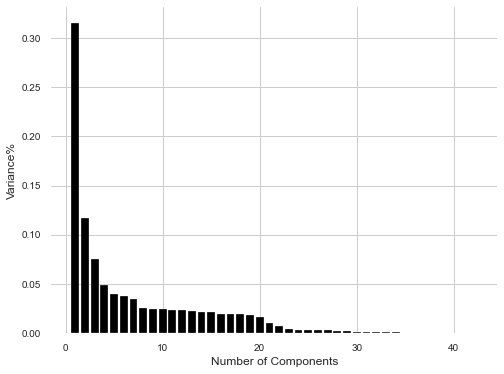

In [182]:
plt.figure(figsize=(8,6))
plt.bar(x=list(range(1,43)), height=pca.explained_variance_ratio_,color='black')
plt.xlabel('Number of Components',fontsize=12)
plt.ylabel('Variance%',fontsize=12)

In [183]:
pca=PCA(n_components=7)
pca.fit(df_EXAM4)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [184]:
X_pca=pca.transform(scaled_df)

In [185]:
X_pca

array([[-784.33335416, -249.76702249, -122.34176826, ...,   12.57244801,
         -76.09388904, -122.12863385],
       [-783.16526645, -247.1314655 , -119.42042979, ...,   16.11847167,
         -76.37119566, -122.13666533],
       [-783.72059283, -244.8337349 , -121.87892027, ...,   13.2545503 ,
         -76.94343802, -123.30053818],
       ...,
       [-784.38532989, -249.26484196, -123.39165087, ...,   13.04744007,
         -77.93362964, -122.62993785],
       [-783.82360436, -248.80796805, -119.68778759, ...,   12.49315398,
         -76.51666503, -122.97449302],
       [-785.43030313, -254.38329564, -123.2703415 , ...,   12.79749365,
         -75.74346081, -123.30666711]])

Text(0, 0.5, 'Second Principal Component')

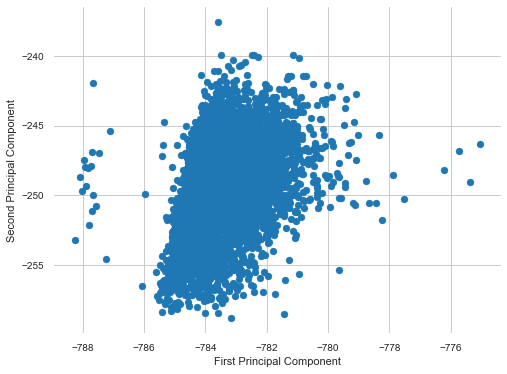

In [186]:
plt.figure(figsize=(8,6))
plt.scatter(x=X_pca[:,0], y=X_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [187]:
X=X_pca
inertia=[]
for n in range (1,11):
    model=KMeans( n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
    model.fit(X)
    inertia.append(model.inertia_)
print(inertia)

[119152.73495360343, 81227.08957280633, 67241.99100597034, 59267.643976650535, 53807.71720477719, 49399.11224093845, 47033.88061802818, 45043.360739131946, 43351.297428268794, 41923.36993222695]


Text(0, 0.5, 'Inertia')

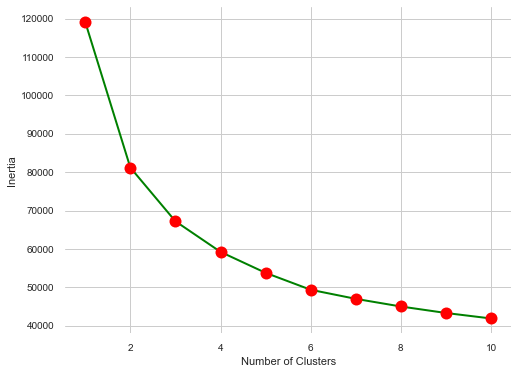

In [188]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
plt.plot(list(range(1,11)), inertia, linewidth=2, markersize=12, color='green', marker='o',markerfacecolor='r', markeredgecolor='r')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [208]:
model=KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
model.fit(X)
labels=model.labels_
centers=model.cluster_centers_


In [209]:
centers

array([[-783.11298845, -247.04589817, -122.99639442,   35.47215946,
          13.70482742,  -76.71747385, -123.14574972],
       [-783.8167571 , -252.14700514, -122.913433  ,   35.58147853,
          13.96266324,  -76.56267045, -123.16629144]])

Text(0, 0.5, 'Second Principal Component')

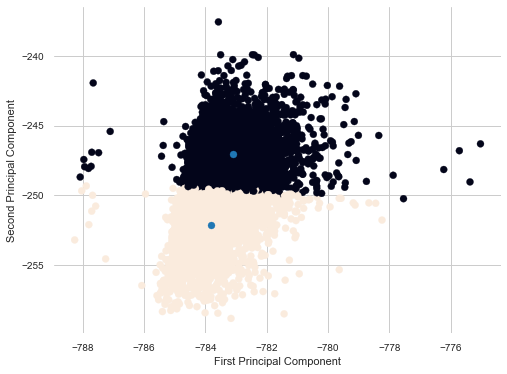

In [210]:
plt.figure(figsize=(8,6))
plt.scatter(x=X_pca[:,0], y=X_pca[:,1],c=labels)
plt.scatter(x=centers[:,0], y=centers[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

____

In [164]:
# Overall Oral Health Exam Status

y = df_EXAM4['OHDEXSTS'].values
y2 = df_EXAM4['OHDEXSTS']

X = df_EXAM4.drop(['OHDEXSTS'], axis=1).values
X2 = df_EXAM4.drop(['OHDEXSTS'], axis=1)
target_names = np.unique(y)

In [157]:
n_comp = 20
# PCA
print('\nRunning PCA ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(X)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])


Running PCA ...
Explained variance: 0.9997
Individual variance contributions:
0.8590242713828402
0.07135186665822056
0.03067173906171094
0.0171570589810741
0.009045664354306664
0.004445963937320981
0.0020797930456728873
0.0013176954098871884
0.0007957828497577775
0.0007460591066734924
0.0006250800338215642
0.0005940378418582264
0.0004916405986116403
0.00040673123214111906
0.0002982108041678937
0.00015382734272867483
0.0001471691594733659
0.00013142383502590701
0.00012091390401155814
0.00011706167371334818


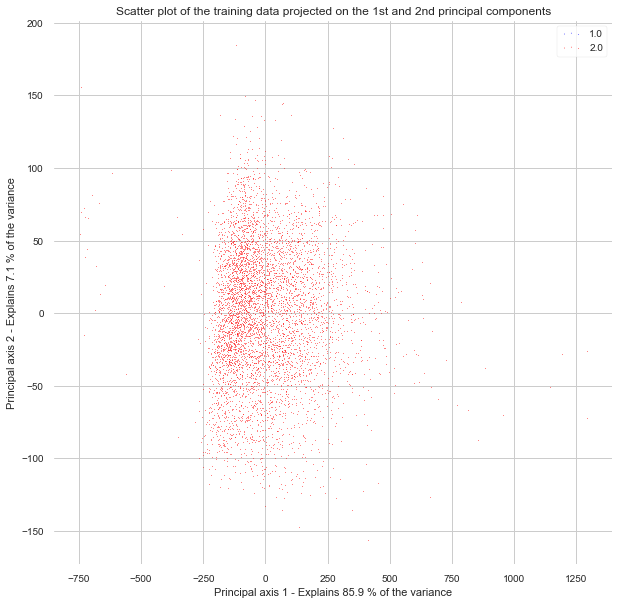

In [172]:
colors = ['blue', 'red']
plt.figure(1, figsize=(10, 10))

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=1,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[1] * 100.0))

plt.savefig('pca-examination_test.png', dpi=150)
plt.show()

In [167]:
from sklearn.preprocessing import MinMaxScaler

ss=StandardScaler()
ss.fit(X)
scaled_df=ss.transform(X)

print('\n Shape of processed train data:', X.shape)



 Shape of processed train data: (5729, 41)


In [170]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=1001, perplexity=30, method='barnes_hut', n_iter=1000, verbose=1)
X_tsne = tsne.fit_transform(X) # this will either fail or take a while (most likely overnight)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5729 samples in 0.015s...
[t-SNE] Computed neighbors for 5729 samples in 0.710s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5729
[t-SNE] Computed conditional probabilities for sample 2000 / 5729
[t-SNE] Computed conditional probabilities for sample 3000 / 5729
[t-SNE] Computed conditional probabilities for sample 4000 / 5729
[t-SNE] Computed conditional probabilities for sample 5000 / 5729
[t-SNE] Computed conditional probabilities for sample 5729 / 5729
[t-SNE] Mean sigma: 13.358559
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.388527
[t-SNE] KL divergence after 1000 iterations: 1.550734


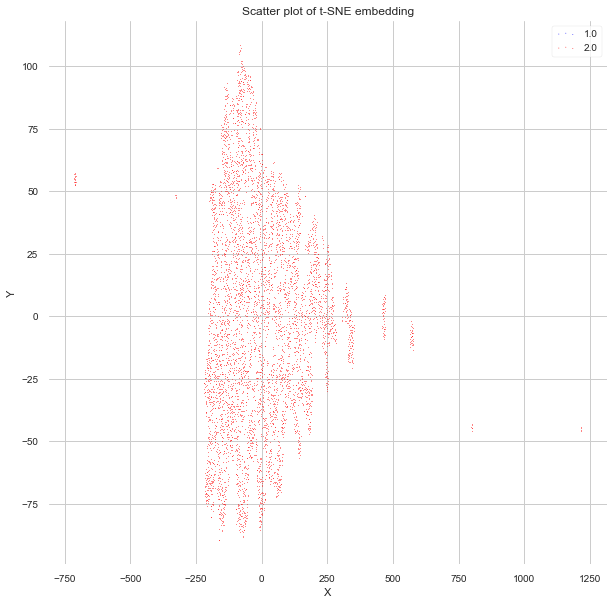

In [171]:
plt.figure(2, figsize=(10, 10))

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], color=color, s=1,
                 alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title('Scatter plot of t-SNE embedding')
plt.xlabel('X')
plt.ylabel('Y')

plt.savefig('t-SNE-examination_test.png', dpi=150)
plt.show()

In [118]:
df_EXAM4['OHDDESTS'].value_counts()

1.0    5728
3.0       1
Name: OHDDESTS, dtype: int64